## Приложение для анализа малых выборок

Разработан прототип, позволяющий повторно провести анализ **малых данных** по схеме, приведенной в аналитическом отчете для проекта [Разработка прототипа приложения для анализа промысловых данных](https://professionals4-0.ru/project/gpn-108/). 





Ниже приведены проблемы анализа малых выборок и рекомендации по их решениям, алгоритм построения регрессионной модели.

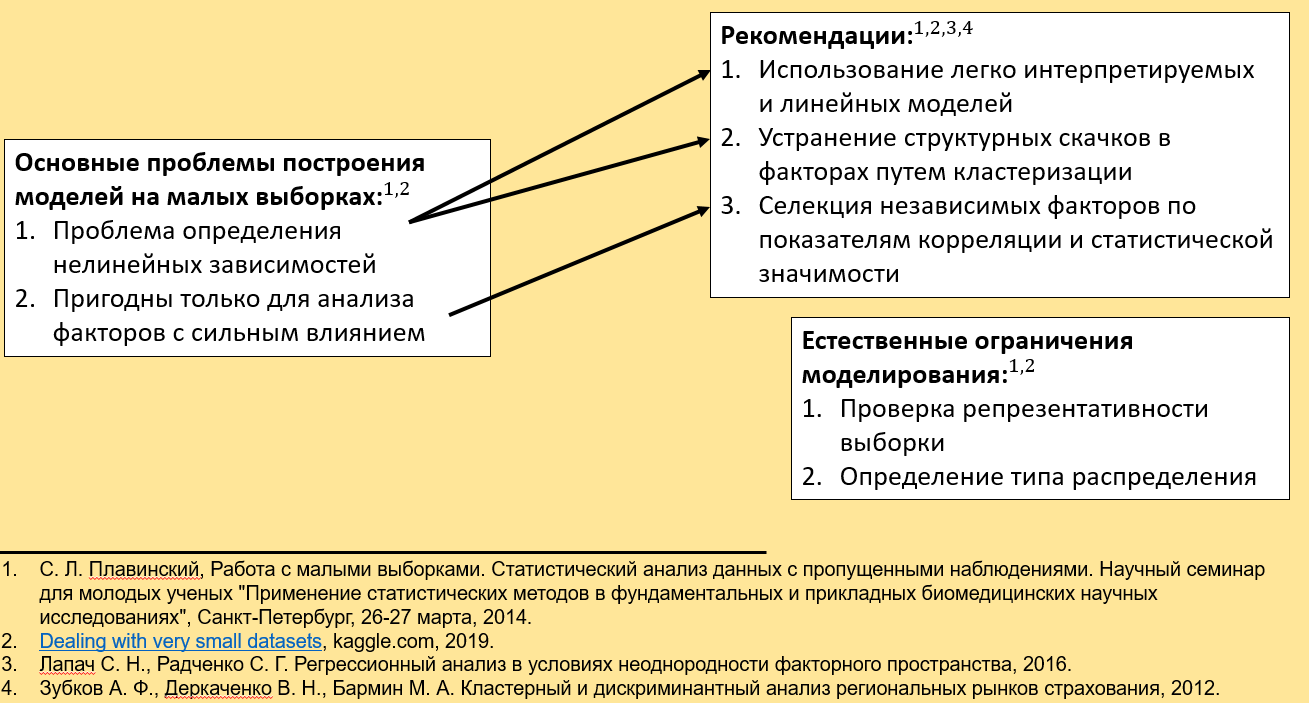

В соответствии с рекомендациями выбран следующий стек технологий анализа:  
•	иерархический кластерный анализ (для выделения групп с относительно высокими/низкими целевыми показателями);  
•	линейный дискриминантный анализ (для построения моделей для качественного прогнозирования);  
•	линейный регрессионный анализ (для построения моделей для количественного прогнозирования);  
•	прогнозирование на основе регрессионной модели методом сэмплирование Монте-Карло.

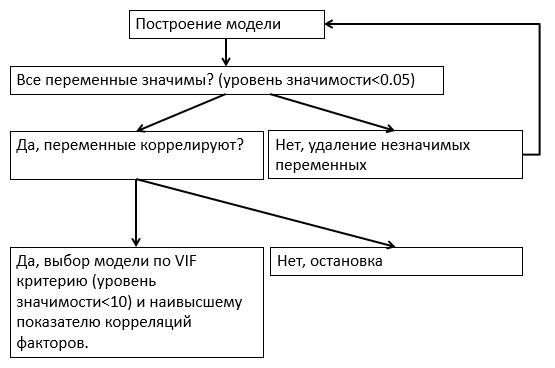


Прототип предоставляет возможность конфигурации важных параметров моделирования. В качестве настроек по умолчанию установлены параметры, использованные в ходе анализа. На рисунках ниже представлен интерфейс прототипа до и после загрузки файла (осуществляется подгрузка вкладок моделирования и визуализации). 
Прототип соответствует следующим требованиям:  
•	прототип использует только библиотеки с открытым исходным кодом;  
•	интерфейс разработан с использованием интерактивных HTML-виджетов Jupyter Notebook;  
•	исходный код оформлен в соответствии с руководством PEP 8;  
•	прототип передан в формате исполняемого файла Jupyter Notebook .ipynb.

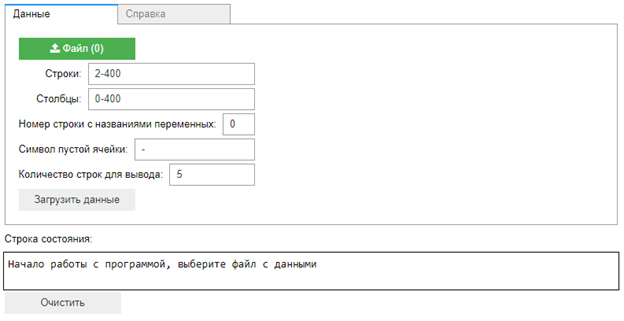

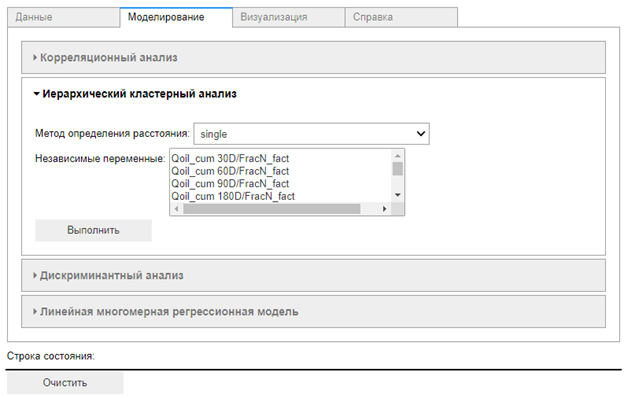

# Запуск приложения

In [1]:
#for kernel reboot
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")


#my libraries
import MyDataUpload
import MyModeling
import MyVisual
import MyHelp

#standard libraries
import time
import threading
import functools
import importlib
import warnings

warnings.simplefilter("ignore")

importlib.reload(MyDataUpload)
importlib.reload(MyModeling)
importlib.reload(MyVisual)
importlib.reload(MyHelp)

#data analysis libraries
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

#visualisation libraries
import matplotlib.pyplot as plt
from ipywidgets import Layout
import ipywidgets as widgets


#----------------------------------------------------------------------------------------
#Report box--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------
clear_report = widgets.Button(
    description='Очистить'
)

def ClearReport(b):
    out_report.clear_output()


clear_report.on_click(ClearReport)   


out_report = widgets.Output(layout={'border': '1px solid black'})

with out_report:
    print('Начало работы с программой, выберите файл с данными \n')

   
#----------------------------------------------------------------------------------------
#Main data tab--------------------------------------------------------------------------------
#----Box_UploadTab------------------------------------------------------------------------------------
DataUpload = MyDataUpload.main(out_report)
tab = widgets.Tab(
    children = [DataUpload[0],  
                MyHelp.main()]
)

tab.set_title(0, 'Данные')
tab.set_title(1, 'Справка')

report_box = widgets.VBox(
    children=( out_report, clear_report
             )
)

main_box = widgets.VBox(
    children=(tab, widgets.Label('Строка состояния:'), report_box
             )
)

def work():
    global flag, df
    while flag:
        time.sleep(0.5) 
        if MyDataUpload.IfButtonUploadClicked():
            #MyModeling.main(out_report, DataUpload[1])
            df = MyDataUpload.main(out_report)[1]
            tab.children = [DataUpload[0], 
                            MyModeling.main(out_report, df), 
                            MyVisual.main(out_report, df), 
                            MyHelp.main()]
            tab.set_title(0, 'Данные')
            tab.set_title(1, 'Моделирование')
            tab.set_title(2, 'Визуализация')
            tab.set_title(3, 'Справка')
            
            flag = False
             

flag = True
thread = threading.Thread(target=work)
display(main_box)
thread.start()

